In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from diagnostics.evaluation import fit_and_eval, weighted_quad_kappa
from transformers.one_hot_encoder import CustomOneHotEncoder
from tools.datasets import get_boston, get_heart, get_houses, get_prudential
from sklearn.metrics import make_scorer, accuracy_score, f1_score


In [18]:

# data, labels, continuous, discrete, dummy, categorical, target = get_boston()
data, labels, continuous, discrete, dummy, categorical, target = get_heart()
# data, labels, continuous, discrete, dummy, categoric|al, target = get_houses()
# data, labels, continuous, discrete, dummy, categorical, target = get_prudential()

train = data.drop(target, axis=1)

In [19]:
model = Pipeline([
        ('onehot',       CustomOneHotEncoder(columns=categorical)),
        ('zero_filler',  ZeroFiller()),
        ('classifier',   LogisticRegression()),                # for Heart Disease
        # ('classifier',   LabelsClipper(LinearRegression())), # for Prudential
        # ('regressor',    LinearRegression()),                # for Boston and Houses
])

In [46]:
scores = cross_val_score(model, train.copy(), labels, cv=3, n_jobs=-1, scoring=make_scorer(accuracy_score))
# scores = cross_val_score(model, train.copy(), labels, cv=3, n_jobs=-1, scoring=make_scorer(weighted_quad_kappa))

/home/johnny/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/johnny/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/johnny/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
print('mean: ', scores.mean(),'\nstd:    ', scores.std())

mean:  0.8571846649107404 
std:     0.006001198903836653


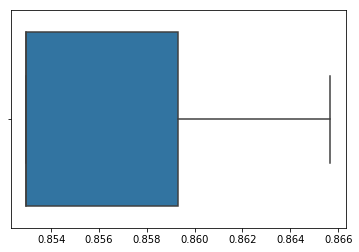

In [48]:
sns.boxplot(scores)

array([2, 3, 0, 1, 4])